In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

## Constructive Methods

- ```GeoSeries.buffer(distance, resolution=16)```
Renvoie une GeoSeries de géométries représentant tous les points situés à une distance donnée de chaque objet géométrique.
- ```GeoSeries.boundary```
Renvoie une GeoSeries d'objets de dimension inférieure représentant la limite théorique de chaque géométrie.
- ```GeoSeries.centroid```
Renvoie une GeoSeries de points pour chaque centroïde géométrique.
- ```GeoSeries.convex_hull```
Renvoie une GeoSeries de géométries représentant le plus petit Polygone convexe contenant tous les points de chaque objet, sauf si le nombre de points de l'objet est inférieur à trois. Pour deux points, la coque convexe se réduit à une LineString ; pour 1, à un Point.
- ```GeoSeries.envelope```
Renvoie une GeoSeries de géométries représentant le point ou le plus petit polygone rectangulaire (avec des côtés parallèles aux axes de coordonnées) qui contient chaque objet.
- ```GeoSeries.simplify(tolerance, preserve_topology=True)```
Renvoie une GeoSeries contenant une représentation simplifiée de chaque objet.
- ```GeoSeries.unary_union```
Renvoie une géométrie contenant l'union de toutes les géométries de la GeoSeries.

## Affine transformations

- ```GeoSeries.affine_transform(self, matrix)```
Transform the geometries of the GeoSeries using an affine transformation matrix
- ```GeoSeries.rotate(self, angle, origin='center', use_radians=False)```
Rotate the coordinates of the GeoSeries.
- ```GeoSeries.scale(self, xfact=1.0, yfact=1.0, zfact=1.0, origin='center')```
Scale the geometries of the GeoSeries along each (x, y, z) dimension.
- ```GeoSeries.skew(self, angle, origin='center', use_radians=False)```
Shear/Skew the geometries of the GeoSeries by angles along x and y dimensions.
- ```GeoSeries.translate(self, xoff=0.0, yoff=0.0, zoff=0.0)```
Shift the coordinates of the GeoSeries.

## Exemple

In [2]:
nybb_path = gpd.datasets.get_path('nybb')
boros = gpd.read_file(nybb_path)
boros.set_index('BoroCode', inplace=True)
boros.sort_index(inplace=True)
boros

,BoroName,Shape_Leng,Shape_Area,geometry
BoroCode,,,,
1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."
3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."


<AxesSubplot:>

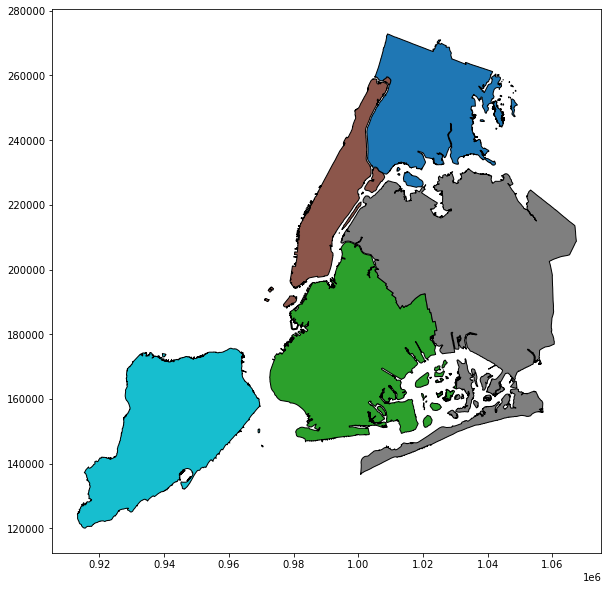

In [13]:
boros.plot(column="BoroName", figsize=(10,10), edgecolor="black")

<AxesSubplot:>

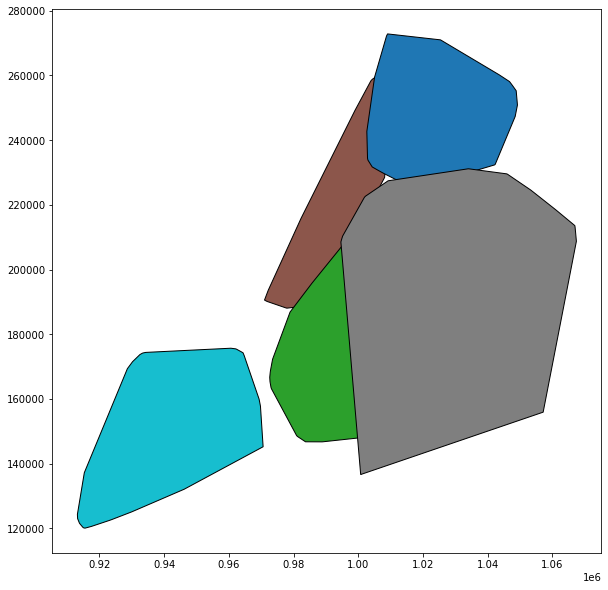

In [16]:
boros_convex = boros.copy()
boros_convex['geometry'] = boros['geometry'].convex_hull
boros_convex.plot(column="BoroName", figsize=(10,10), edgecolor="black")